# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

Importing Required Libraries

In [2]:
train_data=pd.read_excel(r"E:\Machine Leraning\Data_Train.xlsx")

Importing train dataset

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Sample data of dataset

In [4]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All features are categorical datatypes and traget variable is integer datatype

As we want to predict the price we want to build regression model

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Dataset have one missing values in two columns let's just drop the na values using dropna 

In [6]:
train_data.shape

(10683, 11)

Dataset have 10683 rows and 11 columns

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can observe the datatypes,null values  and memory usage of dataset

In [8]:
train_data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Unique values of each columns

In [9]:
train_data.dropna(inplace=True)

Dropped nan values

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now there is no missing values

# EDA

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Here some of columns have date and time data  but it is in categorical format we want to convert it into datetime using to_datetime

In [12]:
train_data['Day_of_Journey']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

Converting day of journey into datetime and seperating day

In [13]:
train_data['Month_of_Journey']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

Converting date of journey into datetime and seperating month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Now dataset have two sepearted column for month and day

In [15]:
train_data['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

Year of date is same for all data now we seperated day and month and we don't need this column anymore so we are dropping it

In [16]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

Date of journey column dropped

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Now there is no column named 'Date of journey'

Now there Departure time,arrival time duration all are in categorical dtypes we want to convert it

In [18]:
train_data['Dep_Hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

train_data['Dep_Minute']=pd.to_datetime(train_data['Dep_Time']).dt.minute

Converted into datetime and seperated hour and minute in Depature time

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


New column is created dep_hour and minute now let's drop the departure hour column from dataset 

In [20]:
train_data.drop(['Dep_Time'],axis=1,inplace=True)

Dropped column Dep_Time

In [21]:
train_data.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


In [22]:
#Doing above steps in arrival time

train_data['Arrival_Hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour

train_data['Arrival_Minute']=pd.to_datetime(train_data.Arrival_Time).dt.minute

#dropping Arrival time column
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

Seperated hour and minute column after that dropped it

In [23]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


Two new features created 

In [24]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 10m      1
29h 40m      1
27h 55m      1
30h 15m      1
42h 5m       1
Name: Duration, Length: 368, dtype: int64

In [25]:

# Assigning and converting Duration column into list
duration_train = list(train_data["Duration"])

for i in range(len(duration_train)):
    if len(duration_train[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + " 0m"   # Adds 0 minute if only have 0 hour
        else:
            duration_train[i] = "0h " + duration_train[i]           # Adds 0 hour if only have 0 minute

In [26]:
#creating empty lists for hours and minutes
duration_hours = []
duration_minutes = []

In [27]:
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep = "h")[0]))    # Extract hours from duration and append to list
    duration_minutes.append(int(duration_train[i].split(sep = "m")[0].split()[-1]))
# Extracts only minutes from duration and append to list

Instead of using to datetime used lists to extract minutes and hour

In [28]:
train_data['Duration_Hours']=duration_hours
train_data['Duration_Minutes']=duration_minutes

Added hours and minutes into dataset

In [29]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0


Added new column into dataset

In [30]:
train_data.drop(['Duration'],axis=1,inplace=True)

"Duration" column is dropped

In [31]:
train_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


Duration column is not anymore in dataset

In [32]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Count of diffrent airline companies

In [33]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Places from flights depart

In [34]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Places where flight arrives

In [35]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Counts of if flight where connected or direct flight

In [36]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Additional informations of Flights

In [37]:
airline_pivot=train_data.pivot_table(index='Airline',values='Price',aggfunc=np.mean)

Comparing airlines and it's ticket price

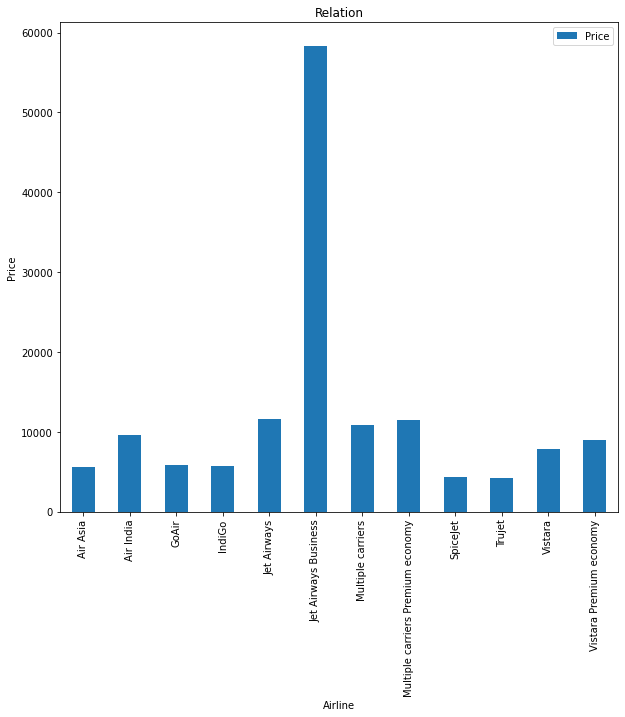

In [38]:
#plotting 
airline_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Relation")
plt.show()

Plotting usng bar plot and jet airways business have highest fare

# Encoding

In [39]:
train_data=pd.get_dummies(train_data,columns=['Airline'])

Apply dummies on airlines

In [40]:
train_data.head(3)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,...,0,0,1,0,0,0,0,0,0,0


Now we can observe dummies were created

In [41]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [42]:
source_pivot=train_data.pivot_table(index='Source',values='Price',aggfunc=np.mean)

Comparing source and price using pivot table

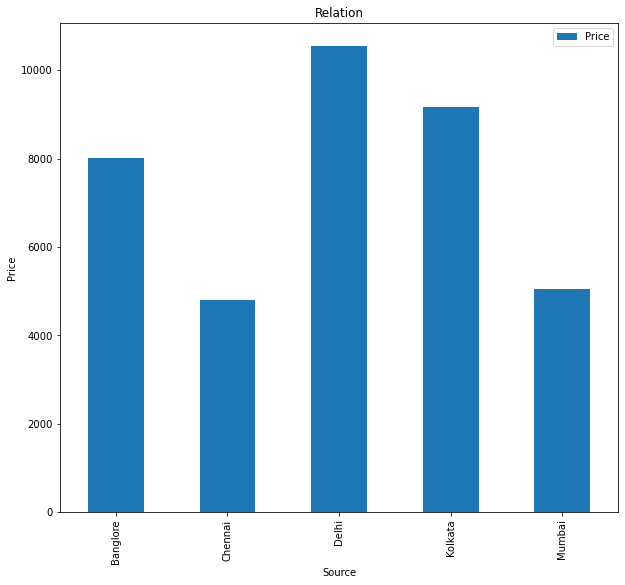

In [43]:
#plotting 
source_pivot.plot(kind='bar',figsize=(10,9))
plt.xlabel("Source")
plt.ylabel("Price")
plt.title("Relation")
plt.show()

Delhi high price

In [44]:
train_data=pd.get_dummies(train_data,columns=['Source'])

Applied dummies for source

In [45]:
train_data.head(3)

,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,1,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,...,0,0,0,0,0,0,0,1,0,0


Created dummies

In [46]:
train_data=pd.get_dummies(train_data,columns=['Destination'])

Created dummies for Destination

In [47]:
train_data.head(2)

,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0


In [48]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

Dropped Two columns route and additional info. Here route and totla stops are same data,so we don't need it and most of additional info contains no info.So it is not need for prediction

In [49]:
train_data.head(3)

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0


Columns dropped

In [50]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [51]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

Total stops values are replaced

In [52]:
train_data.head(3)

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0


Total stops replaces

In [53]:
train_data.shape

(10682, 33)

Now we have 10682 rows and 33 columns

# Test Data

In [54]:
test_data=pd.read_excel(r"E:\Machine Leraning\Test_set.xlsx")

Test data is imported

In [55]:
test_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info


Sample data of dataset

In [56]:
test_data.shape

(2671, 10)

Dataset have 2671 rows and 10 columns

In [57]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All are categorical types

In [58]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values in test data

# EDA

Performing Eda which have done to train set, creating dummies label encoding converting to datetime

In [59]:
test_data['Day_of_Journey']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day

test_data['Month_of_Journey']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month

test_data['Dep_Hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour

test_data['Dep_Minute']=pd.to_datetime(test_data['Dep_Time']).dt.minute

test_data['Arrival_Hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour

test_data['Arrival_Minute']=pd.to_datetime(test_data.Arrival_Time).dt.minute

converted into dataetime and seperated into month day hour and minute

In [60]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Day_of_Journey', 'Month_of_Journey', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute'],
      dtype='object')

In [61]:
test_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

Dropped columns

In [62]:
# Assigning and converting Duration column into list
duration_test = list(test_data["Duration"])

for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + " 0m"   # Adds 0 minute if only have 0 hour
        else:
            duration_test[i] = "0h " + duration_test[i]           # Adds 0 hour if only have 0 minute

In [63]:
#creating empty lists for hours and minutes
duration_hourst = []
duration_minutest = []

In [64]:
for i in range(len(duration_test)):
    duration_hourst.append(int(duration_test[i].split(sep = "h")[0]))    # Extract hours from duration and append to list
    duration_minutest.append(int(duration_test[i].split(sep = "m")[0].split()[-1]))
# Extracts only minutes from duration and append to list

In [65]:
test_data['Duration_Hours']=duration_hourst
test_data['Duration_Minutes']=duration_minutest

added duration hours and minutes into dataset

In [66]:
test_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45


We can drop Destination column

In [67]:
test_data.drop(['Duration'],axis=1,inplace=True)

Dropped

# Encoding

In [68]:
test_data=pd.get_dummies(test_data,columns=['Airline'])

test_data=pd.get_dummies(test_data,columns=['Source'])

test_data=pd.get_dummies(test_data,columns=['Destination'])

Created Dummies for columns

In [69]:
test_data.head(3)

,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,...,0,1,0,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,...,0,0,1,0,1,0,0,0,0,0
2,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,...,0,1,0,0,0,1,0,0,0,0


Dummies created

In [70]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

Dropped Unwanted columns

In [71]:
test_data.head(3)

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1 stop,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,1,0,0,0,0
1,1 stop,12,5,6,20,10,20,4,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1 stop,21,5,19,15,19,0,23,45,0,...,0,1,0,0,0,1,0,0,0,0


Dropped

In [72]:
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

Replaced values

In [73]:
test_data.head(3)

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,1,0,0,0,1,0,0,0,0


Dataset after performing eda

In [74]:
test_data.shape

(2671, 31)

Shape of dataset after performing eda 

# Correlation

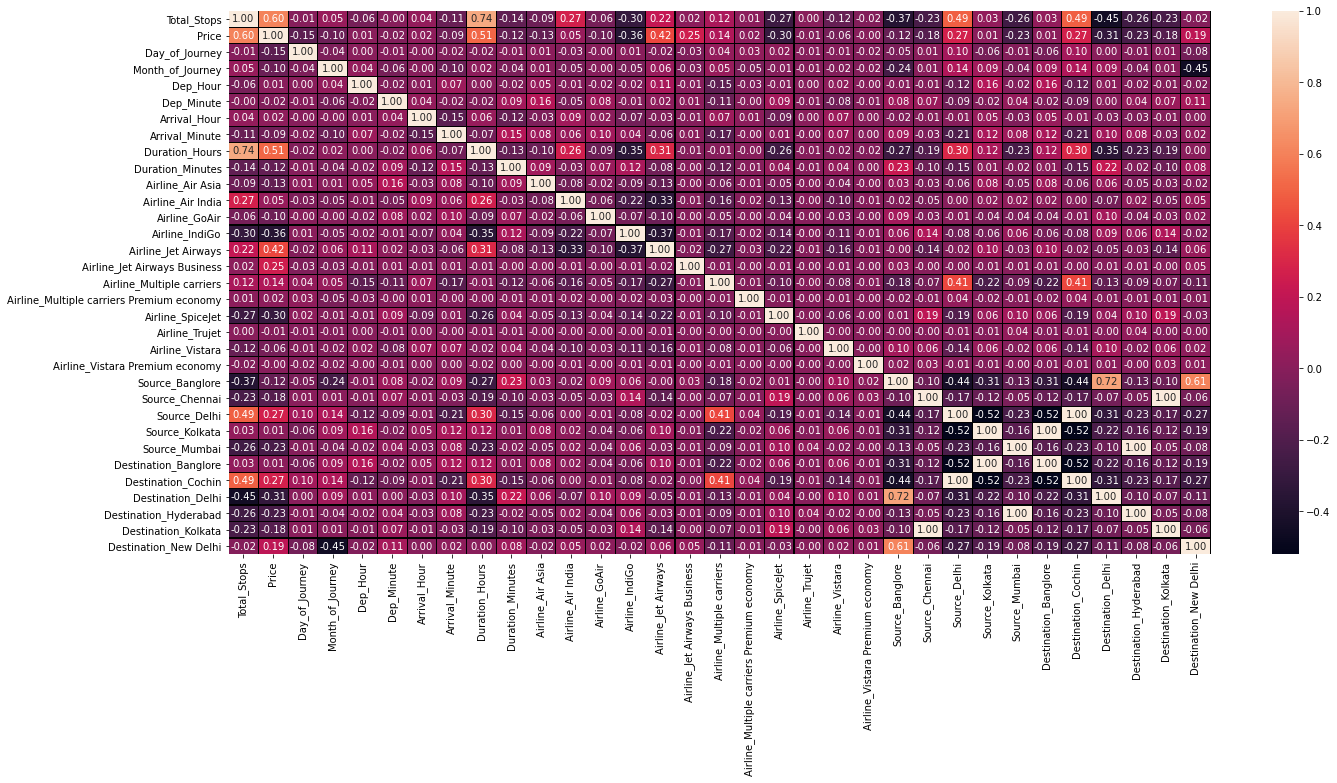

In [75]:
plt.figure(figsize=(22,10))
sns.heatmap(train_data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

Departure time and arrivaltime is not affecting the price and also price is correlated to jet business airways it means priceof business class increases

# Seperating Independent and dependent variable

In [76]:
x=train_data.drop('Price', axis = 1)
y = train_data['Price']

Seperated

In [77]:
x.head(3)

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,...,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,1,0,0,0,1,0,0,0,0


Sample data of independents

In [78]:
pd.DataFrame(y.head())

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


Sample data of target

# Scaling

In [79]:
sc=StandardScaler()
x=sc.fit_transform(x)

Features scaled

# Model Building

In [80]:
#linear regression
lr=LinearRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training r2_score is:- 0.6322156692390455
At random state 0,the testing r2_score is:- 0.588824923086328


At random state 1,the training r2_score is:- 0.6285785742867729
At random state 1,the testing r2_score is:- 0.5991991251944455


At random state 2,the training r2_score is:- 0.6276329327543875
At random state 2,the testing r2_score is:- -2.426543824694468e+25


At random state 3,the training r2_score is:- 0.6303378096595216
At random state 3,the testing r2_score is:- -2.286742893198409e+25


At random state 4,the training r2_score is:- 0.6212746522929782
At random state 4,the testing r2_score is:- -1.483531654382052e+24


At random state 5,the training r2_score is:- 0.6200033913199459
At random state 5,the testing r2_score is:- 0.633093639543598


At random state 6,the training r2_score is:- 0.6235196834284282
At random state 6,the testing r2_score is:- 0.6213254217298401


At random state 6 model performs well
At random state 7,the training r2_score is:- 0.61

At random state 67,the testing r2_score is:- 0.6113996560958299


At random state 68,the training r2_score is:- 0.6226938207646048
At random state 68,the testing r2_score is:- 0.6253806920712862


At random state 69,the training r2_score is:- 0.6259779279311903
At random state 69,the testing r2_score is:- -3.1580357847722945e+24


At random state 70,the training r2_score is:- 0.6299240715324634
At random state 70,the testing r2_score is:- 0.5934210143702148


At random state 71,the training r2_score is:- 0.6152471341986927
At random state 71,the testing r2_score is:- 0.6540664011825643


At random state 72,the training r2_score is:- 0.6307073003646211
At random state 72,the testing r2_score is:- 0.5900069104820584


At random state 73,the training r2_score is:- 0.6175146479902147
At random state 73,the testing r2_score is:- 0.6415340794423958


At random state 74,the training r2_score is:- 0.6128476182153892
At random state 74,the testing r2_score is:- -5.404730766634827e+19


At rando

At random state 132,the training r2_score is:- 0.623758551699132
At random state 132,the testing r2_score is:- 0.6166317369377486


At random state 132 model performs well
At random state 133,the training r2_score is:- 0.6265102316273633
At random state 133,the testing r2_score is:- -3.659757351778757e+21


At random state 134,the training r2_score is:- 0.6111420710461559
At random state 134,the testing r2_score is:- -3.350181443818322e+24


At random state 135,the training r2_score is:- 0.6189439864433233
At random state 135,the testing r2_score is:- 0.6419970787448275


At random state 136,the training r2_score is:- 0.6249671863118396
At random state 136,the testing r2_score is:- 0.6164727806245391


At random state 136 model performs well
At random state 137,the training r2_score is:- 0.6271444358434286
At random state 137,the testing r2_score is:- 0.6057612814088529


At random state 138,the training r2_score is:- 0.6235040123703743
At random state 138,the testing r2_score is:- 0.6

Splitted data into trained and test data,finding best random states for logistic regression

In [81]:
l

[6,
 15,
 42,
 51,
 60,
 78,
 86,
 89,
 91,
 98,
 110,
 117,
 121,
 127,
 132,
 136,
 138,
 142,
 155,
 167,
 174,
 189]

List of best parameters

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=189)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("r2 score",r2_score(y_test,predlr)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score 62.27271944669142
Mean Absolute error 1999.5790842515014
RMSE 2906.077413502271


Applied best random state and print r2 score,mse rmse of logistic regression

In [83]:
#knn regressor
kn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=192)
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print("r2 score",r2_score(y_test,predkn)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predkn))
print("RMSE",np.sqrt(mean_squared_error(y_test,predkn)))

r2 score 77.7098058839479
Mean Absolute error 1384.727187646233
RMSE 2096.1623163332406


Splitted into trained and test data,ath randomstate 192 r2score for kneighbors is 77%

In [84]:
#dt regression
dt=DecisionTreeRegressor()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training r2_score is:- 0.9711683243930616
At random state 0,the testing r2_score is:- 0.6530649023771606


At random state 1,the training r2_score is:- 0.9713569206479382
At random state 1,the testing r2_score is:- 0.6841616951118112


At random state 2,the training r2_score is:- 0.9697464971303987
At random state 2,the testing r2_score is:- 0.6933457420918538


At random state 3,the training r2_score is:- 0.9709256113866737
At random state 3,the testing r2_score is:- 0.7137306257804881


At random state 4,the training r2_score is:- 0.9694481162062542
At random state 4,the testing r2_score is:- 0.7441918804291834


At random state 5,the training r2_score is:- 0.9705325960641745
At random state 5,the testing r2_score is:- 0.7240727091905081


At random state 6,the training r2_score is:- 0.9697592424608927
At random state 6,the testing r2_score is:- 0.7154183608131949


At random state 7,the training r2_score is:- 0.9714329967030113
At random state 7,the testing r2_

At random state 64,the training r2_score is:- 0.9713062170384451
At random state 64,the testing r2_score is:- 0.7240996780656523


At random state 65,the training r2_score is:- 0.9711494667877821
At random state 65,the testing r2_score is:- 0.6727224998791579


At random state 66,the training r2_score is:- 0.9694934938002813
At random state 66,the testing r2_score is:- 0.7058109579542673


At random state 67,the training r2_score is:- 0.9712313064452698
At random state 67,the testing r2_score is:- 0.6616032185605544


At random state 68,the training r2_score is:- 0.9698224665286552
At random state 68,the testing r2_score is:- 0.716223053558173


At random state 69,the training r2_score is:- 0.9710339993146658
At random state 69,the testing r2_score is:- 0.719938556004662


At random state 70,the training r2_score is:- 0.9713637213831376
At random state 70,the testing r2_score is:- 0.6863053682140012


At random state 71,the training r2_score is:- 0.9698906024588929
At random state 71,t

At random state 129,the training r2_score is:- 0.9710809713529651
At random state 129,the testing r2_score is:- 0.6928446105496127


At random state 130,the training r2_score is:- 0.9713599259288955
At random state 130,the testing r2_score is:- 0.741575104486438


At random state 131,the training r2_score is:- 0.9714431917485704
At random state 131,the testing r2_score is:- 0.7018058395575419


At random state 132,the training r2_score is:- 0.9695139166019624
At random state 132,the testing r2_score is:- 0.7085460175339543


At random state 133,the training r2_score is:- 0.9703899911664932
At random state 133,the testing r2_score is:- 0.6649353608420543


At random state 134,the training r2_score is:- 0.9696007454984518
At random state 134,the testing r2_score is:- 0.7624255880030445


At random state 135,the training r2_score is:- 0.9706220016849061
At random state 135,the testing r2_score is:- 0.6631982646336086


At random state 136,the training r2_score is:- 0.9710177522048423
At r

At random state 193,the training r2_score is:- 0.971839437510834
At random state 193,the testing r2_score is:- 0.7014276877467767


At random state 194,the training r2_score is:- 0.969210289456876
At random state 194,the testing r2_score is:- 0.7351758158008155


At random state 195,the training r2_score is:- 0.9712593896866178
At random state 195,the testing r2_score is:- 0.7321417583920731


At random state 196,the training r2_score is:- 0.969709760290745
At random state 196,the testing r2_score is:- 0.6030285452502664


At random state 197,the training r2_score is:- 0.9686656765804353
At random state 197,the testing r2_score is:- 0.7148432513596747


At random state 198,the training r2_score is:- 0.9703606669190689
At random state 198,the testing r2_score is:- 0.7105156125956831


At random state 199,the training r2_score is:- 0.9684615490247542
At random state 199,the testing r2_score is:- 0.7647198914008771




Splitted into train and test data and finding best random state for decision tree

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=195)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 score",r2_score(y_test,preddt)*100)
print("Mean Absolute error",mean_absolute_error(y_test,preddt))
print("RMSE",np.sqrt(mean_squared_error(y_test,preddt)))

r2 score 73.52948893490272
Mean Absolute error 1350.9805568554048
RMSE 2377.826872513143


Applied best random state,at random state 195 r2 score for decision tree is 73% 

In [86]:
#rf regression
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=195)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2 score",r2_score(y_test,predrf)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predrf))
print("RMSE",np.sqrt(mean_squared_error(y_test,predrf)))

r2 score 84.2232066422039
Mean Absolute error 1157.3050545381282
RMSE 1835.7284401720742


Splitted into train and test data.applied best random state for random forest.At random state 195 r2 score is 84%

# Cross Validation Score

In [87]:
print("CV score and it's mean of KNearest Neighbors:",cross_val_score(kn,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predkn))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,preddt))
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predlr))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=7).mean(),"r2 score:",r2_score(y_test,predrf))

CV score and it's mean of KNearest Neighbors: 0.758719489315568 r2 score: -0.760734336825087
CV score and it's mean of Decision Tree Regressor: 0.7051201541558304 r2 score: 0.7352948893490272
CV score and it's mean of Linear Regression: -3.202843643194944e+23 r2 score: -0.6510243138728706
CV score and it's mean of Random Forest: 0.8085875985741938 r2 score: 0.8422320664220391


Here cv score and r2 score of decision tree is least differences so i choose decision tree as my final model

# Hyper Parameter Tuning

In [95]:
parameters={'min_samples_split':np.arange(0,10),'splitter':['best','random'],'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
          'max_depth':np.arange(0,14)}

Storing decision tree parameters 

In [96]:
gsv=GridSearchCV(dt,parameters,cv=7)

Calling gridsearch cv cv score = 7

In [97]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

Fitted data

In [98]:
gsv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 13,
 'min_samples_split': 5,
 'splitter': 'random'}

Best parameters after tuning

In [99]:
best=DecisionTreeRegressor(criterion='friedman_mse',max_depth=13,splitter='random',min_samples_split=5)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(r2_score(y_test,predbest))
print(acc_b*100)

83.03213537969462


Applied best parameters for decision tree regressor and printed r2 score 

# Saving Model

In [100]:
import joblib as jb
jb.dump(best,"Best_Price.pkl")

['Best_Price.pkl']

Model saved